https://udlbook.github.io/udlbook/

https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap03/3_2_Shallow_Networks_II.ipynb

# **Блокнот 3.2: Малослойные нейронные сети II (Shallow neural networks II)**

Цель этого блокнота - немного познакомиться с малослойными нейронными сетями с 2D-входами.  Он работает на примере, подобном рисунку 3.8, и экспериментирует с различными функциями активации. <br><br>

Пройдитесь по ячейкам ниже, запуская каждую ячейку по очереди. В разных местах вы увидите метку "TODO". Следуйте инструкциям в этих местах и напишите код для выполнения функций. В тексте также есть вопросы.

In [2]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Код для рисования 2D-функции - прочитайте его, чтобы вы знали, что происходит, но вам не нужно его менять
def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256, cmap='hot', vmin=-10, vmax=10.0)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')


# Построим нейронную сеть. Предполагаем, что входные данные находятся в диапазоне [0,10],[0,10], а выходные данные [-10,10]
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3):

  fig, ax = plt.subplots(3,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
  draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
  draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y)
  ax.set_title('Network output, $y$')
  ax.set_aspect(1.0)
  plt.show()

In [4]:
# Определим функцию активации ReLU (Rectified Linear Unit)
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [5]:
# Определим нейронную сеть с двумя входами, одним выходом и тремя скрытыми блоками
def shallow_2_1_3(x1,x2, activation_fn, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):
  # TODO Замените строки ниже, чтобы получить три начальные линейные зависимости
  # (рис. 3.8a-c) из параметров theta. Это предварительная активация (preactivations)
  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

  # Передадим их в функцию ReLU для вычисления активаций (activations),
  # как показано на рисунке 3.8 d-f
  act_1 = ReLU(pre_1)
  act_2 = ReLU(pre_2)
  act_3 = ReLU(pre_3)

  # TODO Замените приведенный ниже код,
  # присвоите каждой активации свой вес, используя phi1, phi2 и phi3,
  # чтобы создать эквивалент рисунка 3.8 g-i
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3


  # TODO Замените приведенный ниже код на комбинирование взвешенных активаций и
  # добавьте phi_0, чтобы создать выходные значения, как показано на рисунке 3.8j
  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Вернем все, что мы вычислили
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

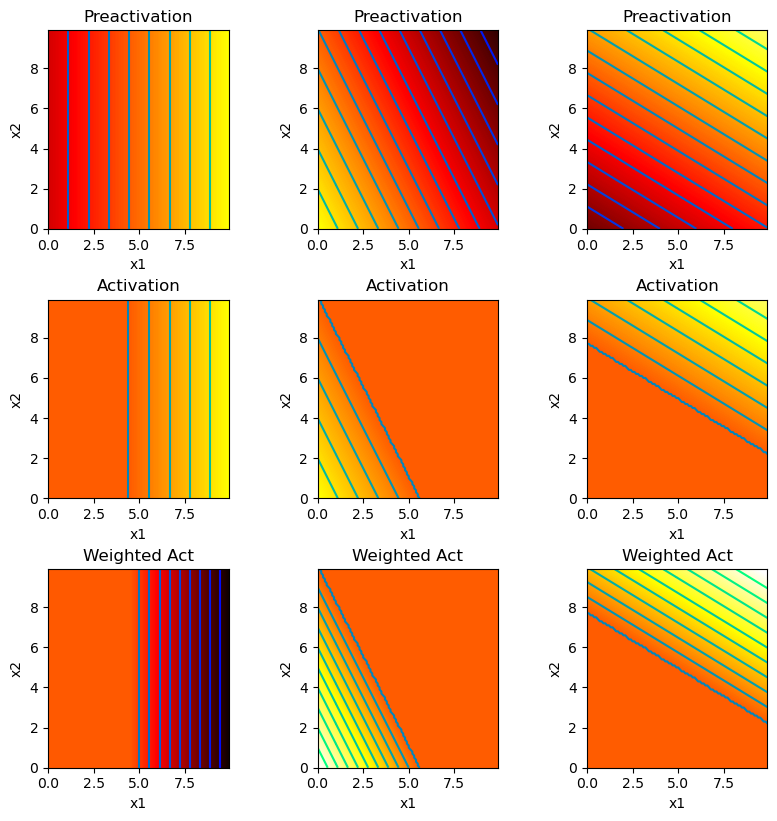

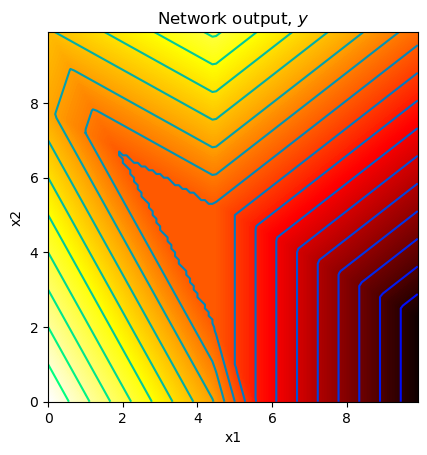

In [6]:
# Теперь давайте определим некоторые параметры и запустим нейронную сеть
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Запустим нейронную сеть для каждого из этих входных значений
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# А затем построим полученные зависимости
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3)

Сколько различных линейных многогранников создается с помощью этой модели?  Определите каждый из них в выходных данных сети.

Теперь мы расширим эту модель, чтобы иметь два выходных сигнала $y_1$ и $y_2$, каждый из которых можно визуализировать с помощью отдельной тепловой карты.  Теперь у вас будут наборы параметров $\phi_{10}, \phi_{11}, \phi_{12}, \phi_{13}$ и $\phi_{20}, \phi_{21}, \phi_{22}, \phi_{23}$, которые соответствуют к каждому из этих выходов.

In [8]:
# Построим нейронную сеть. Предполагаем, что входные данные находятся в диапазоне [0,10],[0,10], а выходные данные [-10,10]
def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23):

  # Построение промежуточных графиков, если установлен флаг
  fig, ax = plt.subplots(4,3)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
  draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
  draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
  draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
  draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
  draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
  draw_2D_function(ax[2,0], x1,x2,w_act_11); ax[2,0].set_title('Weighted Act 1')
  draw_2D_function(ax[2,1], x1,x2,w_act_12); ax[2,1].set_title('Weighted Act 1')
  draw_2D_function(ax[2,2], x1,x2,w_act_13); ax[2,2].set_title('Weighted Act 1')
  draw_2D_function(ax[3,0], x1,x2,w_act_21); ax[3,0].set_title('Weighted Act 2')
  draw_2D_function(ax[3,1], x1,x2,w_act_22); ax[3,1].set_title('Weighted Act 2')
  draw_2D_function(ax[3,2], x1,x2,w_act_23); ax[3,2].set_title('Weighted Act 2')
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y1)
  ax.set_title('Network output, $y_1$')
  ax.set_aspect(1.0)
  plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y2)
  ax.set_title('Network output, $y_2$')
  ax.set_aspect(1.0)
  plt.show()

In [9]:
# Определим нейронную сеть с двумя входами, двумя выходами и тремя скрытыми блоками
def shallow_2_2_3(x1,x2, activation_fn, phi_10, phi_11, phi_12, phi_13, phi_20, phi_21, phi_22, phi_23, theta_10, theta_11,\
                  theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32):

  pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
  pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
  pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2
  act_1 = ReLU(pre_1)
  act_2 = ReLU(pre_2)
  act_3 = ReLU(pre_3)
  w_act_11 = phi_11 * act_1
  w_act_12 = phi_12 * act_2
  w_act_13 = phi_13 * act_3
  w_act_21 = phi_21 * act_1
  w_act_22 = phi_22 * act_2
  w_act_23 = phi_23 * act_3
  y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
  y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

  # Вернем все, что рассчитали
  return y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23


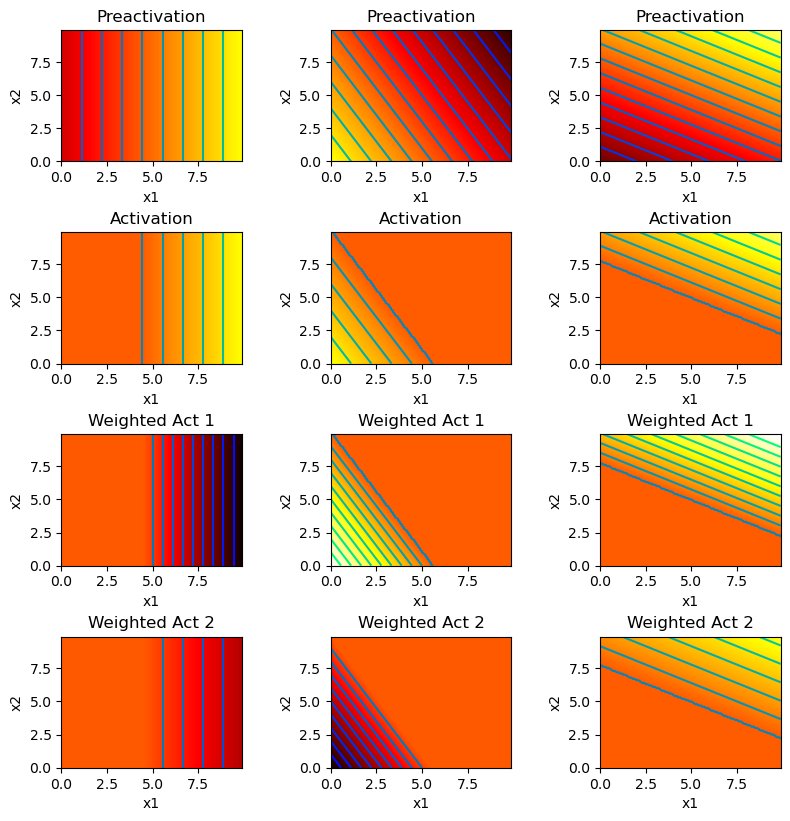

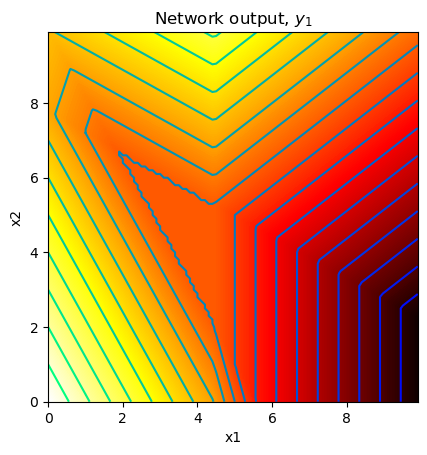

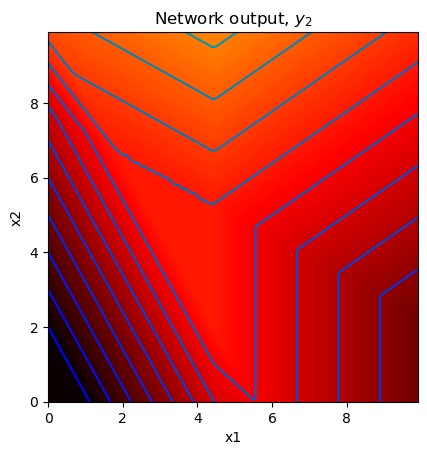

In [10]:
# Теперь давайте определим некоторые параметры и запустим нейронную сеть
theta_10 =  -4.0 ;  theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -7  ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = -2.0; phi_21 = -1.0; phi_22 = -2.0; phi_23 = 0.8

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# Запустим нейронную сеть для каждого из этих входных значений
y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23 = \
    shallow_2_2_3(x1, x2, ReLU, phi_10, phi_11, phi_12, phi_13, phi_20, phi_21, phi_22, phi_23, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# А затем построим полученные зависимости
plot_neural_2_inputs_2_outputs(x1, x2, y1, y2, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_11, w_act_12, w_act_13, w_act_21, w_act_22, w_act_23)